<a href="https://colab.research.google.com/github/Sthelvyn/Data-Science-Projects/blob/main/An%C3%A1lise_Explorat%C3%B3ria_dos_dados_do_AirBnB_(Montreal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://github.com/Sthelvyn/template_portfolio/blob/master/MOIS%C3%89S.png">

#### **Data Scientis & Analyst**
*by [Moisés Sthelvyn](https://github.com/Sthelvyn/Data-Science-Projects)*

---

# Análise dos Dados do Airbnb - *Montreal*

Pensar que a **maior empresa hoteleira da atualidadade** não possui **nenhum** hotel é, no mínimo, assustador!


A plataforma inovadora do Airbnb conecta pessoas que queram viajar
e se hospedar com hosts (anfitriões) que desejam alugar
seus imóveis de forma fácil.

Na véspera do ano novo de 2022, quase **4,5 milhões** de hóspedes
ficaram em acomodações anunciadas na plataforma
em mais de **53.000** destinos no mundo todo.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>


**Neste *notebook*, iremos analisar os dados referentes à cidade de Montreal, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados nessa análise foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para essa análise exploratória, será baixado o seguinte arquivo:
* 'Listing.csv' - *Summary information and metrics for listings in Montreal (good for visualisations).*

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Vamos importar os dados do Airbnb referente às hospedagens de Montreal

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/canada/qc/montreal/2022-12-15/visualisations/listings.csv')

## Análise dos Dados

#### Começaremos analisando esses dados que acabamos de importar. E, a priori, deixarei abaixo um dicionário das variáveis para facilitar a compreensão dos dados e dos passos realizados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de começar, de fato, nossa análise, vamos ver "a cara" do nosso *dataset*, trazendo as 5 primeiras e últimas entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,29059,Lovely studio Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51939,-73.56482,Entire home/apt,147,2,396,2022-11-25,2.60,2,339,51,NaN
1,29061,Maison historique - Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51929,-73.56493,Entire home/apt,278,3,111,2022-10-11,0.84,2,291,26,NaN
2,34715,Chez Patrac ! Montreal - Métro Beaubien,149769,Alain,NaN,Rosemont-La Petite-Patrie,45.53818,-73.60360,Entire home/apt,160,14,9,2022-11-18,0.06,1,131,3,261 026
3,36301,Romantic & peaceful Plateau loft,381468,Sylvie,NaN,Le Plateau-Mont-Royal,45.53026,-73.58413,Entire home/apt,160,31,45,2022-08-22,0.49,6,295,3,NaN
4,46626,Beautiful! Charming! Spacious! Rooms!,208453,Maureen,NaN,Côte-des-Neiges-Notre-Dame-de-Grâce,45.47012,-73.60725,Private room,65,3,42,2022-10-22,0.30,2,361,18,305995


In [ ]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
13908,781177266138093057,"Clean, Comfy and Modern Studio",279892,Julie,NaN,Côte-des-Neiges-Notre-Dame-de-Grâce,45.470596,-73.643483,Entire home/apt,42,32,0,NaN,NaN,1,173,0,NaN
13909,781184587986243680,Spacious 3 bedroom Apt on the Plateau,488779216,Daniel,NaN,Le Plateau-Mont-Royal,45.535280,-73.581756,Entire home/apt,155,2,0,NaN,NaN,18,125,0,NaN
13910,781197509172526291,Lovely 3-bedroom unit - 5 minutes from Downtown,485486671,Sofiane,NaN,Verdun,45.456360,-73.567709,Entire home/apt,99,1,0,NaN,NaN,6,79,0,NaN
13911,781199594633475354,Elegant&Modern Studio Walking Distance to Old ...,4483520,Mikaila,NaN,Ville-Marie,45.516092,-73.563601,Entire home/apt,69,2,0,NaN,NaN,10,86,0,NaN
13912,781201592127815860,Appartement Centre Ville,491316969,Anouar,NaN,Ville-Marie,45.496873,-73.570560,Entire home/apt,320,1,0,NaN,NaN,1,365,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Após a verificação superficial do nosso *dataset*, é hora de identificar quantas entradas há nele, além de identificar os tipos de cada coluna.


Vale salientar que esse dataset que foi baixado se trata de uma versão resumida do Airbnb.



In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar os tipos das colunas
display(df.dtypes)

Entradas:	 13913
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A quantidade de valores ausentes (nulos), está diretamente ligada à qualidade de um *dataset*. Para uma análise mais precisa, faz-se necessário o entendimento se esses valores nulos são significativos quando comparados com o total de entradas

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.925178
reviews_per_month                 0.215841
last_review                       0.215841
name                              0.000431
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

* Podemos notar que **100%** dos valores da coluna `neighbourhood_group` são nulos.
* Cerca de **21%** dos valores das colunas `reviews_per_month`e `last_review`são nulos.
* Mais de **90%** dos dados da coluna `licence`são nulos.

### **Tratando nossos dados ausentes**

Faremos uma limpeza ou preenchimento desses dados ausentes no *dataset*.

A priori, excluirei as colunas `neighbourhood_group`,`licence`e `last_review`, pois, para esse projeto, não se farão necessárias e ao removê-las, teremos um *dataset* mais limpo e com margens de erro menores.

Para isso, irei criar um novo dataset e copiarei os dados para dentro da mesma. Após isso, excluirei as variáveis mencionadas acima desse novo *dataset*.



In [ ]:
df_clean = df.copy()

In [ ]:
#Excluindo as colunas com valores ausentes que não serão utulizadas na análise
df_clean.drop('license', axis=1, inplace=True)
df_clean.drop('last_review', axis=1, inplace=True)
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

Feito isso, vamos agora, observar no nosso *dataset* os valores ausentes restantes. Vamos analisar o que pode ser feito para uma melhor performance, não prejudicando o *dataset* com a exclusão de muitos dados.

In [ ]:
#Trazendo os valores nulos após o primeiro tratamento
df_clean.isnull().sum().sort_values(ascending=False)

name                              6
id                                0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [ ]:
#Verificando novamente os valores ausentes
df_clean.isnull().sum().sort_values(ascending=False)

name                              6
id                                0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

Como sobraram apenas 6 valores em `name`, manteremos o *datset* dessa forma. Não influenciará negativamente nossa análise.

Iremos, agora, comparar os dois *datasets*


In [ ]:
print('Data Frame limpo: ', df_clean.shape)
print('Data Frame original: ', df.shape)

Data Frame limpo:  (13913, 15)
Data Frame original:  (13913, 18)


### **Q3. Qual o tipo de distribuição das variáveis?** 

Feito a limpeza dos dados, partiremos para identificar a distribuição dos dados, através de um histograma.

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>],
       [<AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>,
        <AxesSubplot:title={'center':'calculated_host_listings_count'}>],
       [<AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:title={'center':'number_of_reviews_ltm'}>,
        <AxesSubplot:>]], dtype=object)

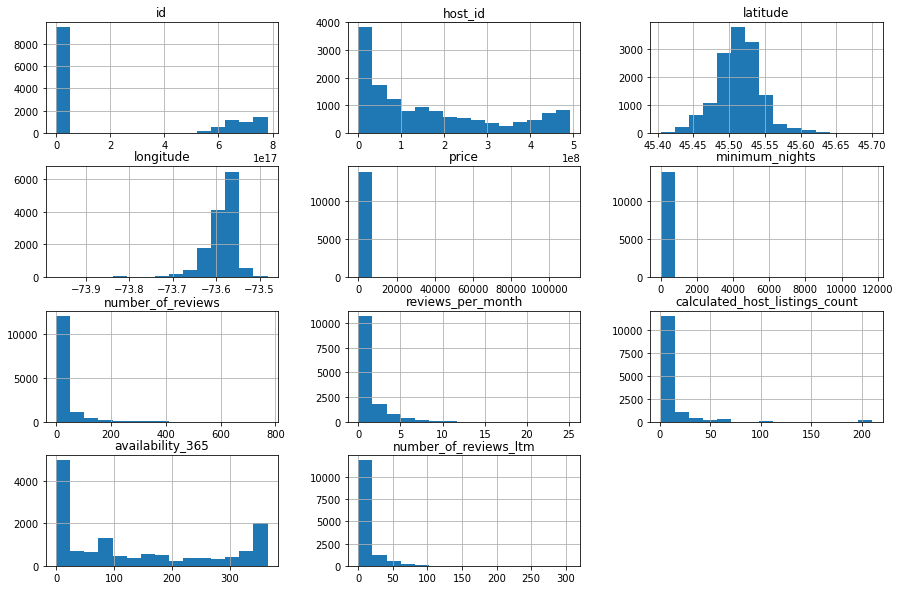

In [ ]:
# plotar o histograma das variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10))

Ao observar os histogramas, podemos ver que os gráficos `price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count`, e `number_of_reviews_ltm`, não estão com os dados devidamente distribuídos, trazendo, assim, a impressão que haja **Outliers**.

Para analisar melhor esses outliers, vamos gerar um resumo estatístico das variáveis.

In [ ]:
df[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,number_of_reviews_ltm
count,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000
mean,169.153022,15.356645,23.733199,10.958025,8.591821
std,1450.083079,106.970858,48.820176,28.894207,16.735904
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,61.000000,1.000000,1.000000,1.000000,0.000000
50%,98.000000,2.000000,5.000000,2.000000,1.000000
75%,150.000000,25.000000,24.000000,7.000000,9.000000
max,110672.000000,11684.000000,771.000000,210.000000,306.000000


Com o resumo estatístico, podemos afirmar o seguinte:
* O preço (price) tem 75% dos valores até 150.00, porém o valor máximo é 110672.00.
* A quantidade mínima de noites está ultrapassando (e muito) os 365 dias do ano.
* O número de avaliações tem 75% abaixo de 24, tendo seu valor máximo de 771.
* O número de listagens feitas por um host, 75% é 7, porém seu valor máximo é 210.
* O número de avaliações por item, 75% é até 9, e seu valor máximo 801.

#### Vamos agora identificar, através de boxplot, os outliers de cada variável.

Boxplot para `price`

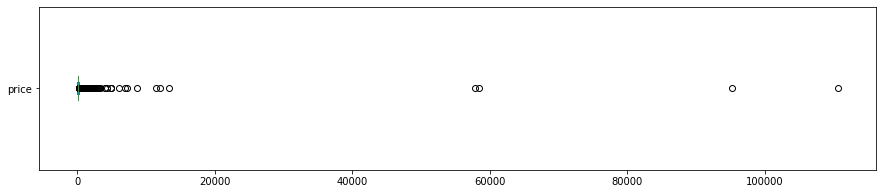


price: valores acima de 1500
82 entradas
0.59%


In [ ]:
df_clean.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Ver quantidade de imóveis acima de 1500
print('\nprice: valores acima de 1500')
print('{} entradas'.format(len(df[df.price > 1500])))
print('{:.2f}%'.format((len(df[df.price > 1500]) / df.shape[0])*100))

Boxplot para `minimum_nights`

Para analisar os outliers dessa variável, tomaremos como base imóveis com mínimo de 3 meses

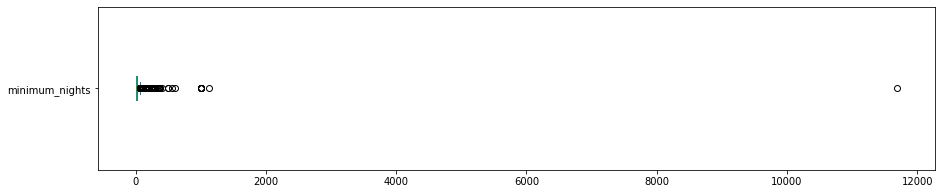


price: valores acima de 90
256 entradas
1.84%


In [ ]:
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Quantidade de valores acima de 90 dias
print('\nprice: valores acima de 90')
print('{} entradas'.format(len(df[df.minimum_nights > 90])))
print('{:.2f}%'.format((len(df[df.minimum_nights > 90]) / df.shape[0])*100))

Boxplot para `numbers_of_reviews`

Para verificar essa variável, vamos tomar como base valores acima de 365.

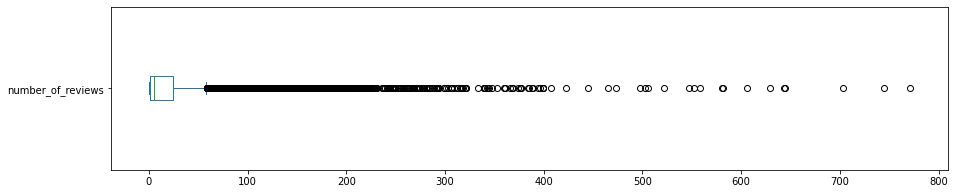


number_of_reviews: valores acima de 365
15 entradas
0.11%


In [ ]:
df_clean.number_of_reviews.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Quantidade de valores acima de 365 dias
print('\nnumber_of_reviews: valores acima de 365')
print('{} entradas'.format(len(df[df.minimum_nights > 365])))
print('{:.2f}%'.format((len(df[df.minimum_nights > 365]) / df.shape[0])*100))

Boxplot para `calculated_host_listings_count`

Vamos analisar os outliers, trazendo valores acima de 200

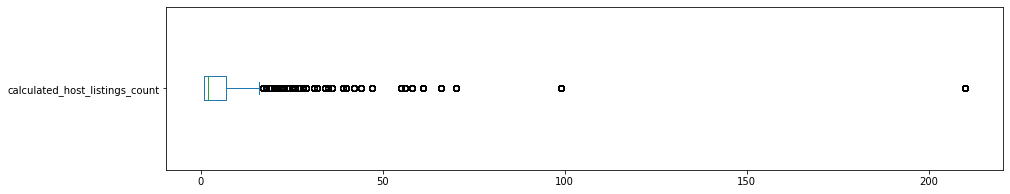


calculated_host_listings_count: valores acima de 200
210 entradas
1.51%


In [ ]:
df_clean.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Quantidade de valores acima de 200
print('\ncalculated_host_listings_count: valores acima de 200')
print('{} entradas'.format(len(df[df.calculated_host_listings_count > 200])))
print('{:.2f}%'.format((len(df[df.calculated_host_listings_count > 200]) / df.shape[0])*100))

Boxplot para `number_of_reviews_ltm`

Para essa variável, vamos tomar como base valores acima de 100

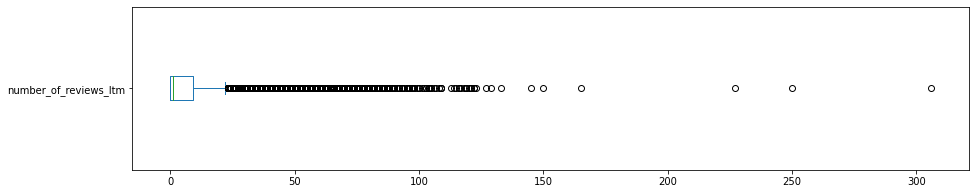


number_of_reviews_ltm: valores acima de 100
40 entradas
0.29%


In [ ]:
df_clean.number_of_reviews_ltm.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Quantidade de valores acima de 100
print('\nnumber_of_reviews_ltm: valores acima de 100')
print('{} entradas'.format(len(df[df.number_of_reviews_ltm > 100])))
print('{:.2f}%'.format((len(df[df.number_of_reviews_ltm > 100]) / df.shape[0])*100))

### **Limpando os Outliers e plotando novamente o Histograma**

Conforme analisado os outliers nas variáveis acima, faremos, agora, a limpeza desses outliers e plotar novamente o histograma. Serão removidos:

* Valores acima de 1500 (variável `price`).
* Valores acima de 90 (variável `minimum_nights`).
* Valores acima de 365 (variável `number_of_reviews`).
* Valores acima de 200 (variável `calculated_host_listings_count`).
* Valores acima de 100 (variável `number_of_reviews_ltm`).

In [ ]:
# Removendo Outliers

df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 90].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 365].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 200].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews_ltm > 100].index, axis=0, inplace=True)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>],
       [<AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>,
        <AxesSubplot:title={'center':'calculated_host_listings_count'}>],
       [<AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:title={'center':'number_of_reviews_ltm'}>,
        <AxesSubplot:>]], dtype=object)

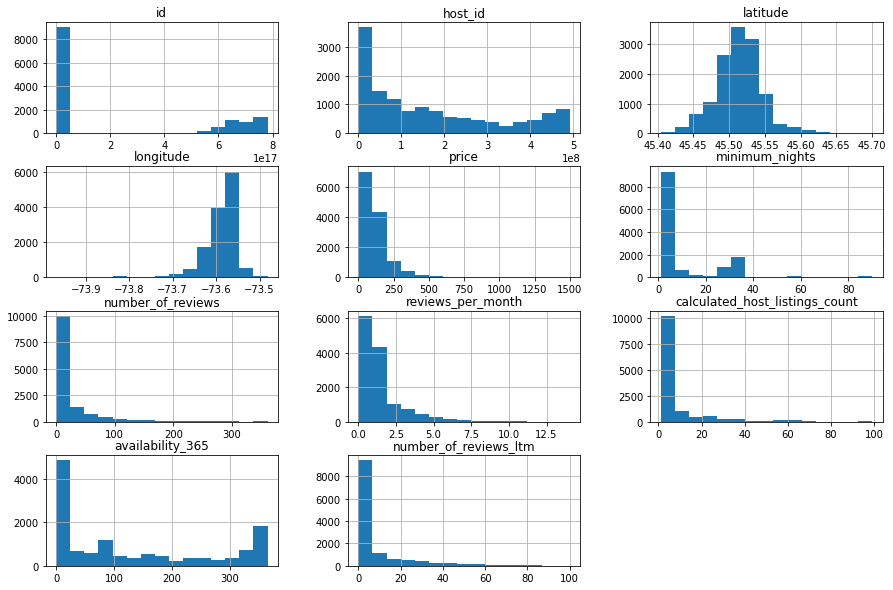

In [ ]:
# Plotando novamente o histograma

df_clean.hist(bins=15, figsize=(15,10))

Conforme podemos observar, os gráficos estão bem melhores distribuídos, trazendo mais precisão e veracidade para nossa análise.

### **Q4. Qual a média dos preços de aluguel?**

Agora, traremos a média dos valores cobrados em **Montreal**.

In [ ]:
# ver a média da coluna `price``
mean_price = df_clean.price.mean()
print('Média de preços em Montreal por noite: {:.2f}'.format(mean_price).replace('.',','))

Média de preços em Montreal por noite: 129,63


### **Q4. Qual a correlação existente entre as variáveis**

De uma forma simplória, correlação a ligação recíproca ou correspondente que existe entre dois ou mais elementos. O conceito é usado de diferentes maneiras, de acordo com o contexto aplicado. Para adentrar mais profundamente nesse conceito, clique [aqui](https://conceito.de/correlacao).

Abaixo segue a matriz de correlação das variáveis do *Dataset*. Assim como o *Heatmap* para melhor visualizar.
Basicamente, quanto mais escuro for o azul, maior a correlação positiva. De mesmo modo, quanto mais escuro for o vermelho, maior a correlação negativa. Branco mostra que não há correlação.

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','number_of_reviews_ltm', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,number_of_reviews_ltm,calculated_host_listings_count,availability_365
price,1.000000,-0.087597,0.025726,0.033941,0.039541,-0.029950,0.153555
minimum_nights,-0.087597,1.000000,-0.073700,-0.205842,-0.203520,0.010000,0.179235
number_of_reviews,0.025726,-0.073700,1.000000,0.411364,0.646015,0.023808,0.081246
reviews_per_month,0.033941,-0.205842,0.411364,1.000000,0.730644,0.113939,0.181502
number_of_reviews_ltm,0.039541,-0.203520,0.646015,0.730644,1.000000,0.138148,0.155483
calculated_host_listings_count,-0.029950,0.010000,0.023808,0.113939,0.138148,1.000000,0.186580
availability_365,0.153555,0.179235,0.081246,0.181502,0.155483,0.186580,1.000000


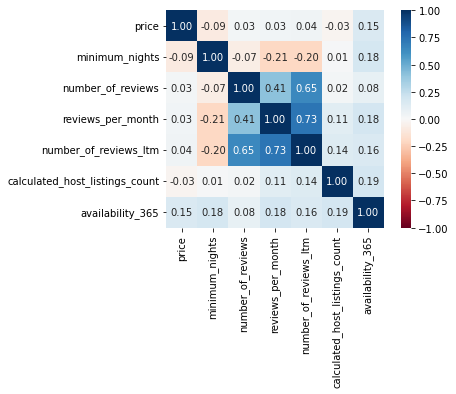

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, vmin=-1.0, vmax=1.0, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Finalizada a análise exploratória dos dados, trarei algumas respostas de perguntas que surgiram durante a análise. Vamos lá!

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Para responder essa pergunta, utilizaremos a coluna `room_type`. Primeiramente, iremos verificar os valores únicos dos tipos de imóveis. Depois, verificaremos a quantidade de ocorrências de cada tipo.

In [ ]:
# Tipos de imóveis com seus valores únicos
df_clean.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [ ]:
# mostrando a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    10154
Private room        3044
Shared room           76
Hotel room            27
Name: room_type, dtype: int64

Entire home/apt    76.340125
Private room       22.885497
Shared room         0.571386
Hotel room          0.202992
Name: room_type, dtype: float64

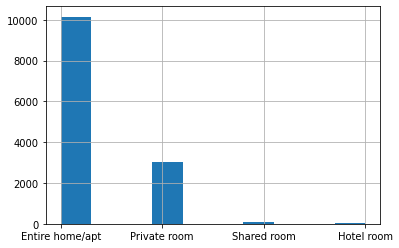

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.hist()
df_clean.room_type.value_counts() / df_clean.shape[0]*100

Com essa análise, podemos notar que o tipo `Entire home/apt`é a grande queridinha de quem deseja se hospedar em **Montreal**.

* 76% Entire Home/Apt (10.104 unidades).
* 22% Private Room (3.044 unidades).
* 0,5% Shared Room (76 unidades).
* 0,2% Hotel Room (27 unidades).

### **Q6. Qual a localidade mais cara de Montreal?**

Utilizaremos a coluna `neighbourhood`para responder essa questão.



In [ ]:
# ver preços por bairros, na média
df_max = (df_clean.groupby('neighbourhood')['price'].max()).sort_values(ascending=False)

print('Valores: {}'.format(df_max))

Valores: neighbourhood
Le Plateau-Mont-Royal                       1500
Ville-Marie                                 1500
Le Sud-Ouest                                1500
Côte-des-Neiges-Notre-Dame-de-Grâce         1499
Rosemont-La Petite-Patrie                   1473
Hampstead                                   1400
Mercier-Hochelaga-Maisonneuve               1350
Côte-Saint-Luc                              1200
Verdun                                      1200
Dollard-des-Ormeaux                         1085
Saint-Laurent                               1031
Montréal-Nord                               1000
Westmount                                   1000
Outremont                                   1000
LaSalle                                      989
Lachine                                      950
Pointe-Claire                                887
Saint-Léonard                                868
Rivière-des-Prairies-Pointe-aux-Trembles     854
Villeray-Saint-Michel-Parc-Extension         8

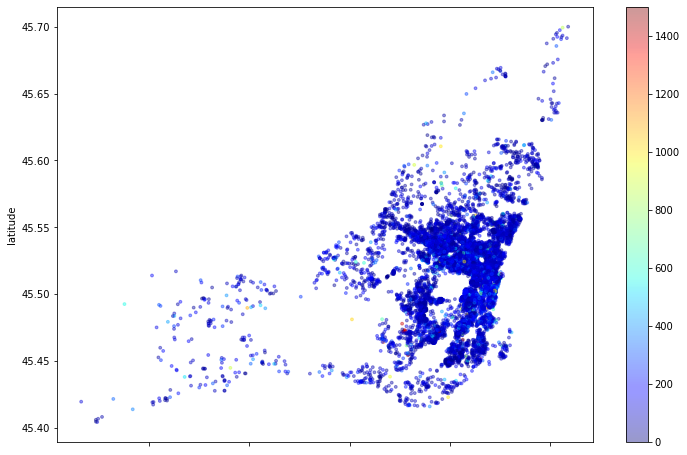

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12, 8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean['minimum_nights'].mean()

10.106608525674762

<AxesSubplot:>

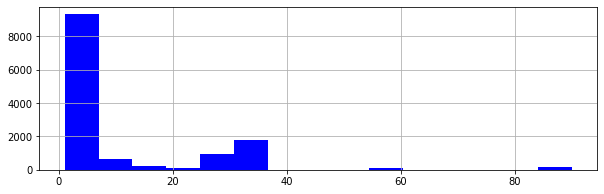

In [ ]:
df_clean.minimum_nights.hist(bins=15, figsize=(10, 3), color='blue')

Como podemos observar, o valor mínimo de noites em **Montreal** é de 10 dias, aproximadamente!

## Conclusões


Apesar de ter sido realizada apenas uma análise superficial desse dataset, consegui obter informações realmente de valor da cidade de **Montreal**.

De uma maneira mais técnica, consegui importar os dados necessários para a análise, assim como as bibliotecas do python. Realizei uma exploração desses dados, analisando e limpando informações que poderiam influenciar negativamente nossos resultados.

Da análise exploratória, conseguir obter: Resumos estatísticos das variáveis, os bairros mais alugados, a localidade mais cara para se alugar, média do mínimo de noites, além da visualização por latitude e longitude de onde se encontra o maior número de hospedagens.

De uma maneira geral, pude mostrar como a análise exploratória de dados contribui no dia a dia, trazendo informaçõe precisas para uma tomada de decisão.